<a href="https://colab.research.google.com/github/nameisdheeraj/Intel-Image-Classification/blob/main/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !sudo cp /content/drive/MyDrive/Kaggle/kaggle.json /root/.kaggle/

In [ ]:
# !cd /content/drive/MyDrive/Kaggle/Datasets
# !kaggle datasets download -d puneet6060/intel-image-classification
# !unzip intel-image-classification.zip -d /content/drive/MyDrive/Kaggle/Datasets/intel-image/
# !rm intel-image-classification.zip
# # !rm -rf /content/drive/MyDrive/Kaggle/Datasets/intel-image

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pickle

In [ ]:
classes = ['buildings', 'forest', 'glacier','mountain','sea','street']

In [ ]:
path = '/content/drive/MyDrive/Kaggle/Datasets/intel-image'
root_list = os.listdir(path)
root_list

['seg_pred', 'seg_test', 'seg_train']

In [ ]:
# x_train = []
# y_train = []
# x_test = []
# y_test = []
# x_pred = []
# for i in root_list:
#   if i == 'seg_test':
#     test_list = os.listdir(path + '/' + i + '/' + i)
#     for j in range(len(classes)):
#       for cls in test_list:
#         if cls == classes[j] :
#           test_img_list = os.listdir(path + '/' + i + '/' + i + '/' + cls)
#           for img in test_img_list:
#             actual_image = cv2.imread(path + '/' + i + '/' + i + '/' + cls +'/' + img)
#             print("\r",end="")
#             print("\rProcessed {0} images".format(img),end="")
#             final_image = cv2.resize(actual_image, (150,150), interpolation=cv2.INTER_CUBIC)
#             x_test.append(final_image)
#             y_test.append(j+1)

#   elif i == 'seg_train':
#     train_list = os.listdir(path + '/' + i + '/' + i)
#     for j in range(len(classes)):
#       for cls in train_list:
#         if cls == classes[j] :
#           test_img_list = os.listdir(path + '/' + i + '/' + i + '/' + cls)
#           for img in test_img_list:
#             actual_image = cv2.imread(path + '/' + i + '/' + i + '/' + cls +'/' + img)
#             print("\r",end="")
#             print("\rProcessed {0} images".format(img),end="")
#             final_image = cv2.resize(actual_image, (150,150), interpolation=cv2.INTER_CUBIC)
#             x_train.append(final_image)
#             y_train.append(j+1)

#   # elif i == 'seg_pred':
#   #   pred_list = os.listdir(path + '/' + i)
#   #   for img in pred_list:
#   #     actual_image = cv2.imread(path + '/' + i + '/' + img)
#   #     print("\r",end="")
#   #     print("\rProcessed {0} images".format(img),end="")
#   #     final_image = cv2.resize(actual_image, (128,128), interpolation = cv2.INTER_CUBIC)
#   #     x_pred.append(final_image)






Processed 9287.jpg images

In [ ]:
# import pickle as pickle

# with open('/content/drive/MyDrive/Kaggle/Projects/intel/x_train.p','wb') as pickle_xtrain:
#   pickle.dump(x_train, pickle_xtrain)

# with open('/content/drive/MyDrive/Kaggle/Projects/intel/x_test.p','wb') as pickle_xtest:
#   pickle.dump(x_test, pickle_xtest)

# with open('/content/drive/MyDrive/Kaggle/Projects/intel/y_train.p','wb') as pickle_ytrain:
#   pickle.dump(y_train, pickle_ytrain)

# with open('/content/drive/MyDrive/Kaggle/Projects/intel/y_test.p','wb') as pickle_ytest:
#   pickle.dump(y_test, pickle_ytest)

# # with open('/content/drive/MyDrive/Kaggle/Projects/x_pred.p','wb') as pickle_xpred:
# #   pickle.dump(x_pred, pickle_xpred)


In [ ]:
x_train = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/intel/x_train.p','rb'))
x_test = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/intel/x_test.p','rb'))
y_train = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/intel/y_train.p','rb'))
y_test = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/intel/y_test.p','rb'))
# x_pred = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/x_pred.p','rb'))

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# x_pred = np.array(x_pred)

In [ ]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_train = pd.get_dummies(y_train_df[0])
y_test = pd.get_dummies(y_test_df[0])

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#print(x_pred.shape)

(14034, 150, 150, 3)
(3000, 150, 150, 3)
(14034, 6)
(3000, 6)


In [ ]:
os.environ['PYTHONHASHSEED'] = str(2)
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.random import set_seed
set_seed(2)

In [ ]:
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(input_shape= (150,150,3), include_top= False, weights='imagenet')

In [ ]:
for layer in base_model.layers[:150]:
  layer.trainable = False

In [ ]:
# tf.keras.backend.clear_session()
# model.reset_states()

# input_layer = Input([150,150,3])
# conv1 = Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
# pool1 = MaxPooling2D(pool_size=(3,3))(conv1)

# conv2 = Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(pool1)
# pool2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)

# # conv3 = Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(pool2)
# # pool3 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv3)

# # conv4 = Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(pool3)
# # pool4 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv4)

# # conv5 = Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(pool4)
# # pool5 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv5)

# # conv6 = Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same')(pool5)
# # pool6 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv6)
x= base_model.output
x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)

x = Dropout(0.2)(x)

output_layer = Dense(6, activation = 'softmax')(x)

model = Model(base_model.input, output_layer)

# model.summary()

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.005), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), verbose =1, batch_size=32, epochs =50)

Epoch 1/50
439/439 [==============================] - 116s 186ms/step - loss: 4.0655 - acc: 0.3044 - val_loss: 1.3204 - val_acc: 0.4817
Epoch 2/50
439/439 [==============================] - 79s 180ms/step - loss: 1.1571 - acc: 0.5780 - val_loss: 1.6262 - val_acc: 0.4513
Epoch 3/50
439/439 [==============================] - 79s 181ms/step - loss: 1.0063 - acc: 0.6438 - val_loss: 0.8784 - val_acc: 0.6710
Epoch 4/50
439/439 [==============================] - 79s 181ms/step - loss: 0.9157 - acc: 0.6815 - val_loss: 1.2907 - val_acc: 0.5833
Epoch 5/50
439/439 [==============================] - 79s 181ms/step - loss: 0.9234 - acc: 0.6536 - val_loss: 1.3401 - val_acc: 0.5490
Epoch 6/50
439/439 [==============================] - 79s 181ms/step - loss: 0.8395 - acc: 0.6949 - val_loss: 1.2644 - val_acc: 0.5667
Epoch 7/50
439/439 [==============================] - 79s 181ms/step - loss: 0.8193 - acc: 0.7121 - val_loss: 0.9559 - val_acc: 0.6427
Epoch 8/50
439/439 [==============================] - 

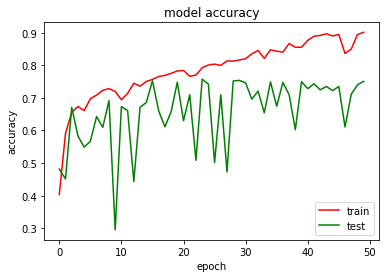

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history.history['acc'], color='red')
ax.plot(history.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/Projects/intel/model_2.h5')

In [ ]:
with open('/content/drive/MyDrive/Kaggle/Projects/intel/history_model_2.p','wb') as pickle_hist:
  pickle.dump(history.history, pickle_hist)

In [ ]:
pred_path = '/content/drive/MyDrive/Kaggle/Datasets/intel-image/seg_pred/seg_pred'
pred_images_list = os.listdir(pred_path)

prediction_image = cv2.imread(pred_path + '/' + pred_images_list[6])
rescaled_pred_image = cv2.resize(prediction_image, (150,150), interpolation = cv2.INTER_CUBIC)

rescaled_pred_image = rescaled_pred_image.reshape(1,150,150,3)

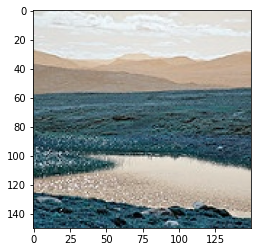

In [ ]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Kaggle/Datasets/intel-image/seg_pred/seg_pred/' + pred_images_list[6]))

In [ ]:
from sklearn.metrics import classification_report
pred = model.predict(rescaled_pred_image)

In [ ]:
np.argmax(pred, axis=1)

array([3])

In [ ]:
print(pred.shape)
print(y_test.shape)

(3000, 6)
(3000, 6)


In [ ]:
print(classification_report(np.argmax(y_test.values, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       437
           1       0.92      0.88      0.90       474
           2       0.72      0.71      0.71       553
           3       0.76      0.64      0.69       525
           4       0.74      0.71      0.72       510
           5       0.66      0.90      0.76       501

    accuracy                           0.75      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.76      0.75      0.75      3000

